In [2]:
import numpy as np
import pandas as pd
import sys
import gc
import joblib
import pathlib
import json
import glob
from tqdm.notebook import tqdm

# visualize
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter
sns.set_context("talk")
style.use('seaborn-colorblind')

import plotly.graph_objects as go

In [3]:
df = pd.read_csv("/Users/sandeep/Workspace/APEX/AZRE/AZRE.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-12,16.120001,16.389999,14.50,14.60,14.60,3218400
1,2016-10-13,14.720000,14.720000,12.73,13.65,13.65,568700
2,2016-10-14,14.160000,14.495000,13.40,13.75,13.75,401500
3,2016-10-17,13.620000,14.500000,13.62,14.31,14.31,221700
4,2016-10-18,14.990000,14.990000,14.50,14.90,14.90,123600


In [4]:
# Add day of the week so we can start to see weekly patterns
df['dayofweek'] = pd.to_datetime(df['Date']).dt.dayofweek
df['dayofweek'].value_counts()

2    273
1    273
3    270
4    267
0    250
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='dayofweek', ylabel='intraday'>

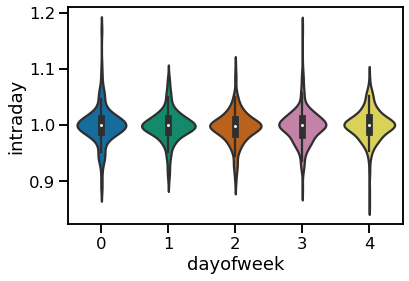

In [5]:
df['intraday'] = df['Close'] / df['Open']
sns.violinplot(x='dayofweek', y='intraday', data=df)

In [6]:
import plotly.express as px
# plotting violins to see the spread of intraday changes on each day
fig = px.violin(df, y="intraday", x='dayofweek')
fig.show()

In [7]:
# plotting violins to see the spread of intraday changes on each day with a different library
fig = go.Figure(data=go.Violin(y=df['intraday'], x=df['dayofweek'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               ))
fig.show()
                            

In [25]:
def backtest(df, day=1):
    """
    Every time buy LOVE with 1000 USD
    """
    
    usd = 1000
    profits = []
    for i in range(len(df)):
        if df['dayofweek'].values[i] == day:
            # buy
            pos_volume = usd / df['Open'].values[i]
            profits.append(pos_volume * (df['Close'].values[i] - df['Open'].values[i]))
    return profits

def plot_profits(profits, day):
    plt.figure()
    profits = np.array(profits)
    plt.plot(np.cumsum(profits))
    winp = np.sum(profits > 0) / len(profits)
    plt.xlabel('week')
    plt.ylabel('profits (USD)')
    plt.title(f'P(win) = {winp:.3f} on day {day}')

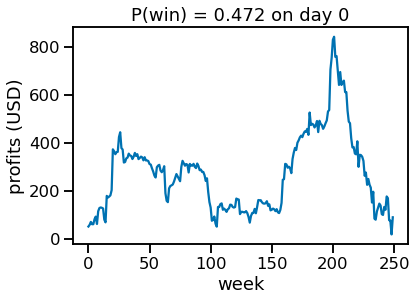

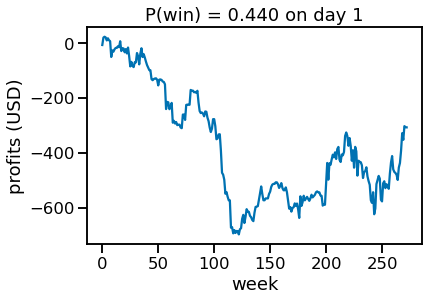

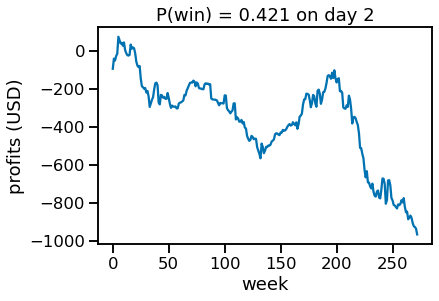

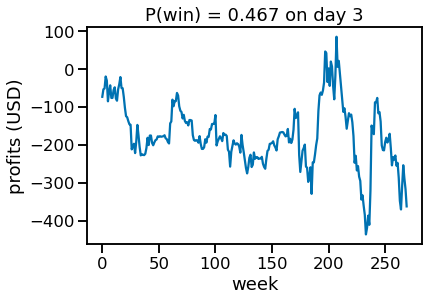

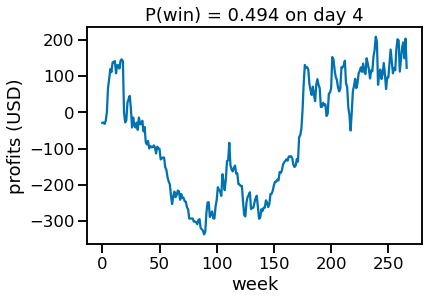

In [26]:
for i in range(0,5):
    profits = backtest(df, day=i)
    plot_profits(profits, day = i)

In [ ]:
profits = backtest(df, day=3)
plot_profits(profits)